In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
from sympy import *

In [19]:
init_printing() # for nice Latex output

In [20]:
x = Symbol('x')

In [21]:
(pi + x)**2

In [22]:
a, b, c = symbols("a, b, c")

In [23]:
type(a)

sympy.core.symbol.Symbol

In [24]:
x = Symbol('x', real=True)
x.is_imaginary

False

In [25]:
x = Symbol('x', positive=True)
x > 0

In [26]:
1 + 1*I

In [27]:
I**2

In [28]:
r1 = Rational(4, 5)

In [29]:
r1

In [30]:
r1**2

In [31]:
pi.evalf(n = 30)

In [32]:
y = (x + pi)**3
y

In [33]:
N(y, 5)

In [34]:
N(y.subs(x, Rational(4,7)))

In [35]:
y.subs(x, log(a+b))

In [36]:
x_vec = np.arange(0, 10, 0.1)
y_vec = np.array([ N(y.subs(x, t)) for t in x_vec ])

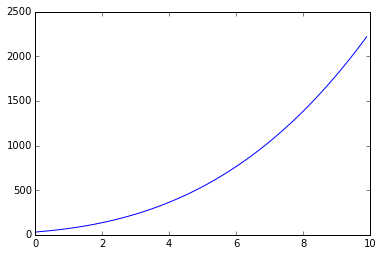

In [37]:
fig, ax = subplots()
ax.plot(x_vec, y_vec);

In [38]:
f = lambdify([x], y, 'numpy') # more efficient

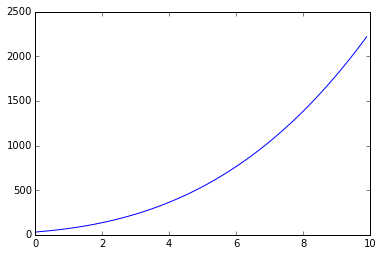

In [39]:
fig, ax = subplots()
ax.plot(x_vec, f(x_vec));

In [40]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

10 loops, best of 3: 31.4 ms per loop


In [41]:
%%timeit

y_vec = f(x_vec)

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 15.8 µs per loop


## Algebraic manipulations

In [42]:
z = (x + b)**3

In [43]:
t = expand(z)
t

In [44]:
s = expand(sin(a+b), trig=True)
s

In [45]:
factor(t)

In [46]:
simplify(z)

In [47]:
simplify(s)

In [48]:
simplify(cos(b)/sin(b))

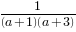

In [49]:
f1 = 1/((a+1)*(a+3))
f1

In [50]:
f2 = apart(f1)
f2

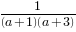

In [51]:
together(f2)

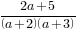

In [52]:
f3 = 1/(a+2) + 1/(a+3)
together(f3)

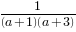

In [53]:
simplify(f2)

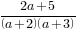

In [54]:
simplify(f3)

In [55]:
x, y, a, b = symbols("x, y, a, b", positive=True)

In [56]:
expression = log(x**a*a**b)
expression

In [57]:
expand(expression, log=True)

## Calculus

In [60]:
y = (x + pi)**3
y

In [61]:
diff(y, x)

In [67]:
x, y, z = symbols("x, y, z", positive=True)
f = sin(x*y) + cos(y**z)
f

In [69]:
diff(f, x, 1, y, 2)

In [70]:
integrate(f, x)

In [71]:
integrate(exp(-x**2), (x, -oo, oo))

### Sums and products

In [72]:
n = Symbol("n")

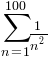

In [74]:
s = Sum(1/n**2, (n, 1, 100))
s

In [75]:
N(s, 10)

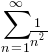

In [76]:
p = Sum(1/n**2, (n, 1, oo))
p

In [77]:
p.evalf()

In [78]:
N(p, 20)

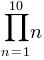

In [79]:
Product(n, (n, 1, 10))

In [80]:
Product(n, (n, 1, 10)).evalf()

### Series

In [81]:
series(exp(x), x)

In [82]:
series(exp(x), x, pi)

In [83]:
series(exp(x), x, 1)

In [86]:
series(exp(x), x, 1, 10)

In [93]:
s1 = series(cos(x), x, 0, 5); s1

In [94]:
s2 = sin(x).series(x, 0, 2); s2

In [95]:
s1*s2

In [96]:
expand(s1*s2)

In [97]:
expand(s1.removeO() * s2.removeO())

In [98]:
(cos(x) * sin(x)).series(x, 0, 6)

### Linear algebra

In [101]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [104]:
A = Matrix([[m11, m12],[m21, m22]]); A

ValueError: 
\left[\begin{smallmatrix}m_{11} & m_{12}\\m_{21} & m_{22}\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦

In [105]:
b = Matrix([[b1], [b2]])
b

ValueError: 
\left[\begin{smallmatrix}b_{1}\\b_{2}\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

In [106]:
A**2

ValueError: 
\left[\begin{smallmatrix}m_{11}^{2} + m_{12} m_{21} & m_{11} m_{12} + m_{12} m_{22}\\m_{11} m_{21} + m_{21} m_{22} & m_{12} m_{21} + m_{22}^{2}\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡    2                               ⎤
⎢ m₁₁  + m₁₂⋅m₂₁    m₁₁⋅m₁₂ + m₁₂⋅m₂₂⎥
⎢                                    ⎥
⎢                                 2  ⎥
⎣m₁₁⋅m₂₁ + m₂₁⋅m₂₂   m₁₂⋅m₂₁ + m₂₂   ⎦

In [107]:
A * b

ValueError: 
\left[\begin{smallmatrix}b_{1} m_{11} + b_{2} m_{12}\\b_{1} m_{21} + b_{2} m_{22}\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡b₁⋅m₁₁ + b₂⋅m₁₂⎤
⎢               ⎥
⎣b₁⋅m₂₁ + b₂⋅m₂₂⎦

In [108]:
A.det()

In [109]:
A.inv()

ValueError: 
\left[\begin{smallmatrix}1 / m_{11} + \frac{m_{12} m_{21}}{m_{11}^{2} \left(m_{22} - m_{12} m_{21} / m_{11}\right)} & - \frac{m_{12}}{m_{11} \left(m_{22} - m_{12} m_{21} / m_{11}\right)}\\- \frac{m_{21}}{m_{11} \left(m_{22} - m_{12} m_{21} / m_{11}\right)} & \frac{1}{m_{22} - m_{12} m_{21} / m_{11}}\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡ 1          m₁₂⋅m₂₁                -m₁₂        ⎤
⎢─── + ────────────────────  ───────────────────⎥
⎢m₁₁      2 ⎛      m₁₂⋅m₂₁⎞      ⎛      m₁₂⋅m₂₁⎞⎥
⎢      m₁₁ ⋅⎜m₂₂ - ───────⎟  m₁₁⋅⎜m₂₂ - ───────⎟⎥
⎢           ⎝        m₁₁  ⎠      ⎝        m₁₁  ⎠⎥
⎢                                               ⎥
⎢          -m₂₁                       1         ⎥
⎢   ───────────────────         ─────────────   ⎥
⎢       ⎛      m₁₂⋅m₂₁⎞               m₁₂⋅m₂₁   ⎥
⎢   m₁₁⋅⎜m₂₂ - ───────⎟         m₂₂ - ───────   ⎥
⎣       ⎝        m₁₁  ⎠                 m₁₁     ⎦

## Solving equations

In [118]:
x, y = symbols("x, y")
solve(x**2 - 1, x)

In [119]:
solve(x**2 + 1, x)

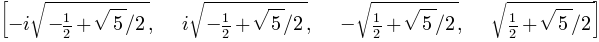

In [120]:
solve(x**4 - x**2 - 1, x)

In [121]:
solve([x + y - 1, x - y - 1], [x,y])

In [123]:
solve([x + y - a, x - y - c], [x,y])

## Quantum mechanics: noncommuting variables -- skipped